In [1]:
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [2]:
start = datetime(2013, 8, 7)
end = datetime(2018, 9, 23)

In [3]:
df = web.DataReader('F', 'iex', start, end)
print(df.loc['2013-10-09'])

5y
open      1.285330e+01
high      1.303240e+01
low       1.272880e+01
close     1.293900e+01
volume    5.082105e+07
Name: 2013-10-09, dtype: float64


In [4]:
stock = df.loc[:,'open']
num = len(stock)
step = 200
x = np.arange(num)
print(num)

1255


In [5]:
xlabels = []
for i in range(0, int(num/step)+1):
    xlabels.append(df.index[step*i])

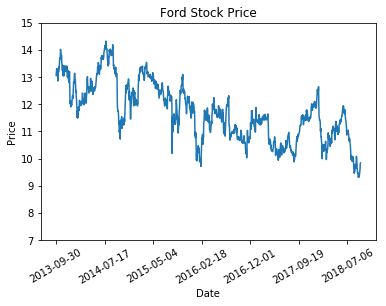

In [6]:
plt.plot(x, stock)
plt.xlabel('Date')
plt.xticks(np.arange(0, 1259, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.ylim(7, 15)
plt.title('Ford Stock Price')
plt.show()
plt.close()

In [7]:
x = x.reshape(-1, 1)
y = stock
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#x = np.arange(num).reshape(-1, 1)
y_pred = regr.predict(x)

In [9]:
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

Mean squared error: 0.50
Variance score: 0.56


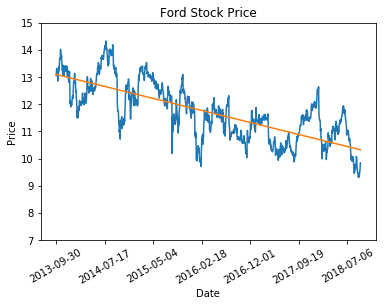

In [10]:
plt.plot(x, stock)
plt.plot(np.arange(0, num), y_pred)
plt.xlabel('Date')
plt.xticks(np.arange(0, 1259, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.ylim(7, 15)
plt.title('Ford Stock Price')
plt.show()
plt.close()

In [11]:
x = np.arange(num)
x = x.reshape(-1, 1)
y = stock

In [12]:
scaler = MinMaxScaler()
y = stock.reshape(len(stock), 1)
scaler = scaler.fit(y)
y = scaler.transform(y)
y = y.reshape(len(stock))

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [13]:
shuffle_indices = np.random.permutation(np.arange(len(y)))
y = y[shuffle_indices]
x = x[shuffle_indices]

In [14]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(1,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1))

In [15]:
network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = network.fit(x, y, epochs=1000, batch_size=125)

Epoch 1/1000
1255/1255 [==============================] - 4s 3ms/step - loss: 4.5020 - mean_squared_error: 4.5020
Epoch 2/1000
1255/1255 [==============================] - 0s 103us/step - loss: 0.2052 - mean_squared_error: 0.20520s - loss: 0.2267 - mean_squared_error: 0.
Epoch 3/1000
1255/1255 [==============================] - 0s 83us/step - loss: 0.2153 - mean_squared_error: 0.2153
Epoch 4/1000
1255/1255 [==============================] - 0s 85us/step - loss: 0.2133 - mean_squared_error: 0.2133
Epoch 5/1000
1255/1255 [==============================] - 0s 75us/step - loss: 0.1491 - mean_squared_error: 0.1491
Epoch 6/1000
1255/1255 [==============================] - 0s 77us/step - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 7/1000
1255/1255 [==============================] - 0s 79us/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 8/1000
1255/1255 [==============================] - 0s 87us/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 9/1000
1255/1255 [==============

1255/1255 [==============================] - 0s 56us/step - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 141/1000
1255/1255 [==============================] - 0s 60us/step - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 142/1000
1255/1255 [==============================] - 0s 58us/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 143/1000
1255/1255 [==============================] - 0s 60us/step - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 144/1000
1255/1255 [==============================] - 0s 77us/step - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 145/1000
1255/1255 [==============================] - 0s 72us/step - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 146/1000
1255/1255 [==============================] - 0s 66us/step - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 147/1000
1255/1255 [==============================] - 0s 67us/step - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 148/1000
1255/1255 [==============================] - 0s 69us/step - loss

1255/1255 [==============================] - 0s 64us/step - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 280/1000
1255/1255 [==============================] - 0s 60us/step - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 281/1000
1255/1255 [==============================] - 0s 74us/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 282/1000
1255/1255 [==============================] - 0s 67us/step - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 283/1000
1255/1255 [==============================] - 0s 69us/step - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 284/1000
1255/1255 [==============================] - 0s 67us/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 285/1000
1255/1255 [==============================] - 0s 68us/step - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 286/1000
1255/1255 [==============================] - 0s 69us/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 287/1000
1255/1255 [==============================] - 0s 70us/step - loss

1255/1255 [==============================] - 0s 63us/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 420/1000
1255/1255 [==============================] - 0s 62us/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 421/1000
1255/1255 [==============================] - 0s 68us/step - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 422/1000
1255/1255 [==============================] - 0s 71us/step - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 423/1000
1255/1255 [==============================] - 0s 67us/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 424/1000
1255/1255 [==============================] - 0s 68us/step - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 425/1000
1255/1255 [==============================] - 0s 69us/step - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 426/1000
1255/1255 [==============================] - 0s 68us/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 427/1000
1255/1255 [==============================] - 0s 68us/step - loss

1255/1255 [==============================] - 0s 57us/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 559/1000
1255/1255 [==============================] - 0s 61us/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 560/1000
1255/1255 [==============================] - 0s 71us/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 561/1000
1255/1255 [==============================] - 0s 67us/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 562/1000
1255/1255 [==============================] - 0s 73us/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 563/1000
1255/1255 [==============================] - 0s 69us/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 564/1000
1255/1255 [==============================] - 0s 66us/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 565/1000
1255/1255 [==============================] - 0s 65us/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 566/1000
1255/1255 [==============================] - 0s 68us/step - loss

1255/1255 [==============================] - 0s 62us/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 698/1000
1255/1255 [==============================] - 0s 59us/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 699/1000
1255/1255 [==============================] - 0s 59us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 700/1000
1255/1255 [==============================] - 0s 55us/step - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 701/1000
1255/1255 [==============================] - 0s 65us/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 702/1000
1255/1255 [==============================] - 0s 67us/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 703/1000
1255/1255 [==============================] - 0s 70us/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 704/1000
1255/1255 [==============================] - 0s 72us/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 705/1000
1255/1255 [==============================] - 0s 68us/step - loss

1255/1255 [==============================] - 0s 63us/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 836/1000
1255/1255 [==============================] - 0s 56us/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 837/1000
1255/1255 [==============================] - 0s 59us/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 838/1000
1255/1255 [==============================] - 0s 65us/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 839/1000
1255/1255 [==============================] - 0s 78us/step - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 840/1000
1255/1255 [==============================] - 0s 65us/step - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 841/1000
1255/1255 [==============================] - 0s 67us/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 842/1000
1255/1255 [==============================] - 0s 69us/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 843/1000
1255/1255 [==============================] - 0s 67us/step - loss

1255/1255 [==============================] - 0s 62us/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 974/1000
1255/1255 [==============================] - 0s 61us/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 975/1000
1255/1255 [==============================] - 0s 60us/step - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 976/1000
1255/1255 [==============================] - 0s 72us/step - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 977/1000
1255/1255 [==============================] - 0s 75us/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 978/1000
1255/1255 [==============================] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.01 - 0s 75us/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 979/1000
1255/1255 [==============================] - 0s 78us/step - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 980/1000
1255/1255 [==============================] - 0s 71us/step - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 981/1000
1255/1255 [=

In [26]:
xrange = 1255
x = np.arange(xrange)
len(x)

1255

In [27]:
y_pred = network.predict(x)
y_pred = scaler.inverse_transform(y_pred)

In [28]:
step = 200
xlabels = []
for i in range(0, int(xrange/step)+1):
    xlabels.append(df.index[step*i])

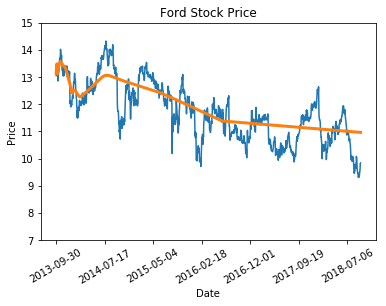

In [29]:
plt.plot(np.arange(0, num), stock)
plt.plot(np.arange(0, num), y_pred, lw=3)
#plt.scatter(shuffle_indices, y_pred, s=1, marker='o', c='orange')

plt.xlabel('Date')
plt.xticks(np.arange(0, 1259, step=step), xlabels, rotation=30)
plt.ylabel('Price')
plt.ylim(7, 15)
plt.title('Ford Stock Price')
plt.show()
plt.close()